# Homework 5 (100 points)
## Due: Tuesday, October 5 @ 6:30 PM 

**The very first thing you should do is save your own copy of this Homework by clicking on File -> "Save a copy in Drive"**

This homework is divided into 3 sections.  Read the instructions below and complete the assignment.

When you complete this assignment, **please submit 1 file and 1 link via Canvas before the deadline.**


1.   Your Jupyter Notebook code as a .ipynb file (File -> "Download .ipynb")
2.   As a comment on your .ipynb submission please include a link to your Google CoLab Jupyter notebook. Click the "Share" button in the top right.  Ensure that anyone with the link has at least "Commenter" access. **Once you submit your HW on Canvas, please do not make any more edits to the Jupyter notebook until after your HW is graded**

Please use the naming convention:  

firstname_lastname_homework5.ipynb

**Until both steps 1 and 2 have been completed, your assignment is considered INCOMPLETE and you will receive -10% per day late until the assignment is completed.**


## Section 1: Design and create your own visualization
**50 points total**

**Point Breakdown**

*   Code (depth of analysis, exploring + cleaning the data): 20 points
*   Visual (chart choice, aesthetics, axis labels, etc.): 15 points
*   Communication (How clearly is your insight/message communicated?): 15 points



Using what you have learned so far in this course, **discover an interesting insight** from one of the data sets that we have worked with so far in this course (your choice) and **share that insight in the form of a compelling data visualization**. Add 1-2 sentences to explain your insight either on the chart or in text below your png.  

If you need inspiration, feel free to draw ideas from "Storytelling with Data" or from the accompanying blog: http://www.storytellingwithdata.com/blog. Also check out some of the sources listed in Section 3 below.

Data sets you can choose from include:
-  Cereal
-  Olympics
-  Books
-  Netflix
-  Wildlife Strikes
-  Baby Names

The deliverable for this section will be a final image file of your visualization that is embedded in a text block in this notebook.  **Feel free to do post-processing of your code-generated visualization with an image editor or Google Slides.**  This will allow you to add supplementary text, titles, annotations etc.  To get your code-generated image file for this step, you can do `<yourchartvariablename>.savefig('myvisualization.png')`.  To embed your image into the notebook, use the "Insert Image" icon in the edit bar of the cell (located between "Insert Link" and "Indent") and select your .png file.

Checklist:
- Have you embedded your .png below into the Google Colab notebook using "Insert Image"?
- Have you included all code used for data cleaning/processing/visualization?
- Have you added some supplementary text (1-2 sentences) either on the viz or in text below the viz to communicate your insight?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wildlife_strikes = pd.read_csv("/content/drive/MyDrive/Data/wildlifestrikes.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
wildlife_strikes.columns
# My idea is to look at the number of injuries and fatalities based on what part of the plane was struck to see if there is a trend

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

In [ ]:
# Getting rid of the columns I'm not interested in; removing the strike columns and keeping the damage columns (if stike and no damage, assume no injury/fatality)
plane_parts = wildlife_strikes.loc[:,['Record ID', 'Operator', 'Aircraft', 'Flight Impact', 'Fatalities',
       'Injuries', 'Windshield Damage', 'Nose Damage', 'Engine1 Damage', 'Engine2 Damage', 'Engine3 Damage', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Damage', 'Wing or Rotor Damage', 'Fuselage Damage', 'Landing Gear Damage', 'Tail Damage',  'Lights Damage', 'Other Damage']]

In [ ]:
# Checking to see that these are the columns I want to look at
plane_parts.head()

,Record ID,Operator,Aircraft,Flight Impact,Fatalities,Injuries,Windshield Damage,Nose Damage,Engine1 Damage,Engine2 Damage,Engine3 Damage,Engine4 Damage,Engine Ingested,Propeller Damage,Wing or Rotor Damage,Fuselage Damage,Landing Gear Damage,Tail Damage,Lights Damage,Other Damage
0,127128,DELTA AIR LINES,B-757-200,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,129779,HAWAIIAN AIR,DC-9,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,129780,UNKNOWN,UNKNOWN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,MILITARY,A-10A,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2257,MILITARY,F-16,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Checking to see that there are a significant number of injuring to work with 
was_injury = plane_parts.Injuries >=1
plane_parts['was_injury'] = was_injury
total_injury = sum(plane_parts.was_injury)
print(total_injury)



229


In [ ]:
# windshield_damage_injuries = plane_parts[plane_parts['Windshield Damage'] == 1]['injury_&_fatality'].sum()
# nose_damage_injuries = plane_parts[plane_parts['Nose Damage'] == 1]['injury_&_fatality'].sum()
# engine1_damage_injuries = plane_parts[plane_parts['Engine1 Damage'] == 1]['injury_&_fatality'].sum()
# engine2_damage_injuries = plane_parts[plane_parts['Engine2 Damage'] == 1]['injury_&_fatality'].sum()
# engine3_damage_injuries = plane_parts[plane_parts['Engine3 Damage'] == 1]['injury_&_fatality'].sum()
# engine4_damage_injuries = plane_parts[plane_parts['Engine4 Damage'] == 1]['injury_&_fatality'].sum()
# engine_ingested_damage_injuries = plane_parts[plane_parts['Engine Ingested'] == 1]['injury_&_fatality'].sum()
# propeller_injuries = plane_parts[plane_parts['Propeller Damage'] == 1]['injury_&_fatality'].sum()
# wing_rotor_injuries = plane_parts[plane_parts['Wing or Rotor Damage'] == 1]['injury_&_fatality'].sum()
# fuselage_injuries = plane_parts[plane_parts['Fuselage Damage'] == 1]['injury_&_fatality'].sum()
# landing_gear_injuries = plane_parts[plane_parts['Landing Gear Damage'] == 1]['injury_&_fatality'].sum()
# tail_injuries = plane_parts[plane_parts['Tail Damage'] == 1]['injury_&_fatality'].sum()
# lights_injuries = plane_parts[plane_parts['Lights Damage'] == 1]['injury_&_fatality'].sum()
# other_injuries = plane_parts[plane_parts['Other Damage'] == 1]['injury_&_fatality'].sum()

windshield_damage_injuries = plane_parts[plane_parts['Windshield Damage'] == 1]['Injuries'].sum()
nose_damage_injuries = plane_parts[plane_parts['Nose Damage'] == 1]['Injuries'].sum()
engine1_damage_injuries = plane_parts[plane_parts['Engine1 Damage'] == 1]['Injuries'].sum()
engine2_damage_injuries = plane_parts[plane_parts['Engine2 Damage'] == 1]['Injuries'].sum()
engine3_damage_injuries = plane_parts[plane_parts['Engine3 Damage'] == 1]['Injuries'].sum()
engine4_damage_injuries = plane_parts[plane_parts['Engine4 Damage'] == 1]['Injuries'].sum()
engine_ingested_damage_injuries = plane_parts[plane_parts['Engine Ingested'] == 1]['Injuries'].sum()
propeller_injuries = plane_parts[plane_parts['Propeller Damage'] == 1]['Injuries'].sum()
wing_rotor_injuries = plane_parts[plane_parts['Wing or Rotor Damage'] == 1]['Injuries'].sum()
fuselage_injuries = plane_parts[plane_parts['Fuselage Damage'] == 1]['Injuries'].sum()
landing_gear_injuries = plane_parts[plane_parts['Landing Gear Damage'] == 1]['Injuries'].sum()
tail_injuries = plane_parts[plane_parts['Tail Damage'] == 1]['Injuries'].sum()
lights_injuries = plane_parts[plane_parts['Lights Damage'] == 1]['Injuries'].sum()
other_injuries = plane_parts[plane_parts['Other Damage'] == 1]['Injuries'].sum()

In [ ]:
strikes_damage_type = [
    ["Windshield",windshield_damage_injuries],
    ["Nose",nose_damage_injuries],
    ["Engine 1",engine1_damage_injuries],
    ["Engine 2",engine2_damage_injuries],
    ["Engine Ingested",engine_ingested_damage_injuries],
    ["Propeller",propeller_injuries],
    ["Wing or Rotor",wing_rotor_injuries],
    ["Fuselage",fuselage_injuries],
    ["Landing Gear",landing_gear_injuries],
    ["Tail",tail_injuries],
    ["Lights",lights_injuries],
    ["Other",other_injuries],
]

data = pd.DataFrame(data=strikes_damage_type, columns=["Damaged Area of the Plane", "Number of Injuries"])


In [ ]:
#data.tail(20)

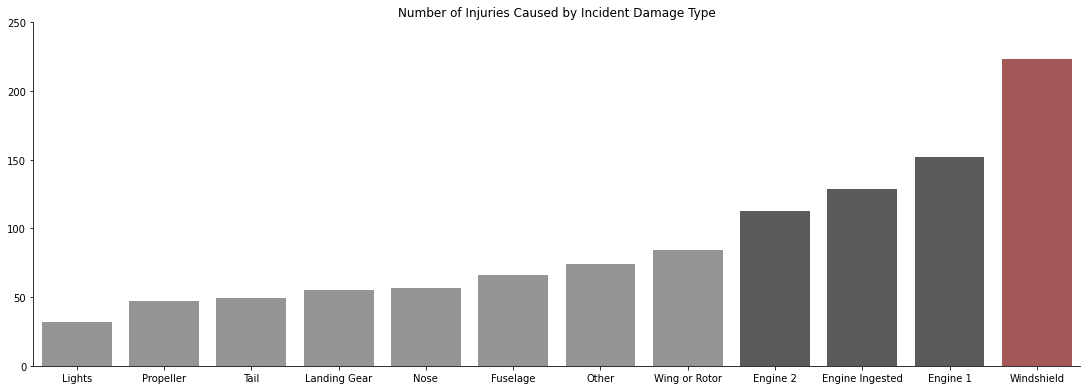

In [ ]:
data.sort_values(by="Number of Injuries", ascending=True, inplace=True)

RED = '#B04D4B'
LIGHT_GRAY = '#949594'
DARK_GRAY = '#595A59'

chart = sns.catplot(
    kind="bar", 
    data=data, 
    x="Damaged Area of the Plane", y
    ="Number of Injuries", 
    height=5.5, 
    aspect=2.8,
    palette={
        'Windshield': RED,
        'Engine 1': DARK_GRAY,
        'Engine Ingested': DARK_GRAY,
        'Engine 2': DARK_GRAY,
        'Wing or Rotor': LIGHT_GRAY,
        'Other': LIGHT_GRAY,
        'Fuselage': LIGHT_GRAY,
        'Nose': LIGHT_GRAY,
        'Landing Gear': LIGHT_GRAY,
        'Tail': LIGHT_GRAY,
        'Propeller': LIGHT_GRAY,
        'Lights': LIGHT_GRAY
        },
).set(title='Number of Injuries Caused by Incident Damage Type')
chart.set(
    ylim=(0,250),
    ylabel=None, 
    xlabel=None
)


In [ ]:
# removed engine 3 & 4 because they were insignificant

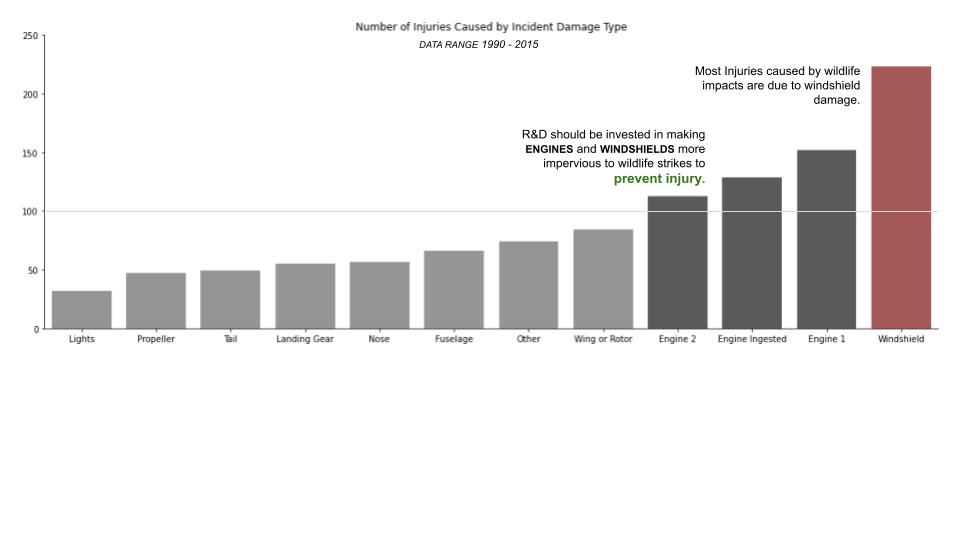

From the analysis we see that 2 areas of the plane are responsible for >100 injuries - Engines 1 & 2, and the windshield. If this visualization was used for a plane producer/designer, or air traffic safety the takeaway may be to invest in R&D for these elements to make them safer against impacts from wildlife. 

This conclusion is logically consistent with the conclusion drawn in the [Civil Strikes to Civil Aircraft](https://digitalcommons.unl.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1006&context=birdstrikeother) report created from this data which mentions on pg.16 that the engines and windshield receive the highest number of impacts. It makes sense that these areas would thus result in the most injury. 

In the analysis Engines 3 & 4 were excluded because they resulted in miniscule amounts of injury. Part of the reason why these engines would have a different result than Engines 1 & 2 in terms of resulting in injury during impact is because the data sources many different makes and models of planes, some of which may not have engines 3 & 4 on the wing due to size. For that reason they are statistically less significant than 1 & 2 though may result in the same or similar amount of injuries in the planes that have them. 

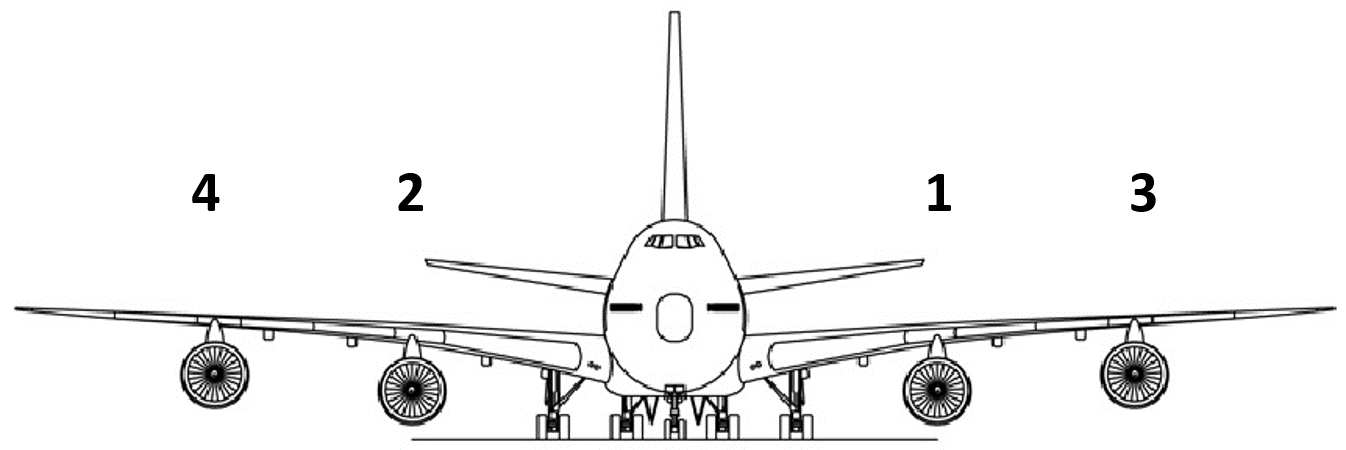

## Section 2:  Critiquing a bad visualization
**25 points**


Find an example of a bad data visualization on the internet (there are plenty). 


*   Embed the image in this CoLab notebook in a text block
*   In a separate text block, outline what makes it bad and describe how it could be improved (4-6 sentences).  



# Your bad visualization here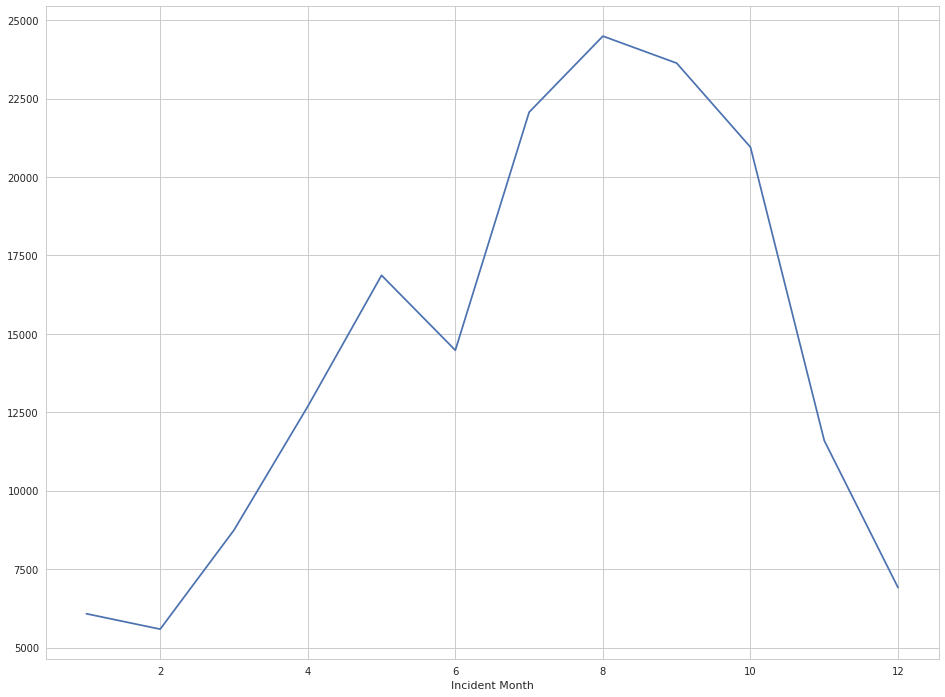

Your critique and suggestions for improvement here

This graph is meant to show the number of wildlife strikes per month but the graph is lacking a lot of detail- 

1. no title, ideally would include in the title or description what years the data is ranging, otherwise this implies it is only one year of data
"Wildlife Aircraft Stikes per Month 1990-2015"
2. no label for the y-axis; something like "Number of Incidents"
3. x-axis is poorly labelled, it should be updated to include each of the 12 months and label them using first 3 letters; once the months are identified the x-axis label can be removed from the month name will be easily identifiable how the axis is counting
4. this graph would read better as a bar chart. because the creator chose line plot the continuation between months doesn't well represent the total per month, rather shows trend over the year
  
  a. I would change this to a bar chart to show the discrete values per month so they are more comparable
  
  b. I would then highlight the month of Aug. red (which the creator wanted to distinguish as the month with the hightest strikes) and the two months on either side a lighter shade of red indicating that they follow the increased strike trend but are not the highest month 
  
  c. and inlay some text around the month of Aug with a conclusion like "Aug has signigicantly more hits each year than any other month" to clearly state the idea they were representing
5. aesthetically, I would remove the grid lines, especially in a bar chart format 
6. Overall, its not clear what this vizualisation is trying to accomplish. their audience isn't clear, their goal isn't very clear, there's no call to action or suggestion. There isn't any particilar reason given as to why there may be increase in the number of strikes during August, like increase species migration patterns, or if there is higher volume of shipping and passenger flights for some strange reason. 
  
  a. we might find better results by creating a heat map that looks at the # of incidents per month per year for maybe the last 5-10 years, and see if there are more specific trends we notice that would make more logical sense with relation to increase plane travel and migration patterns.

## Section 3: Analyzing a good visualization
**25 points**

Find an example of a good data visualization.  


*   Embed the image in this CoLab notebook in a text block
*   In a separate text block, analyze what makes this a good visualization.  Think about the design, use of preattentive attributes, visual hierarchy etc. Summarize your thoughts in 4-6 sentences.




Here are some potential sources:


*   https://flowingdata.com/tag/new-york-times/
*   https://fivethirtyeight.com/
*   https://informationisbeautiful.net/
*   http://reddit.com/r/dataisbeautiful





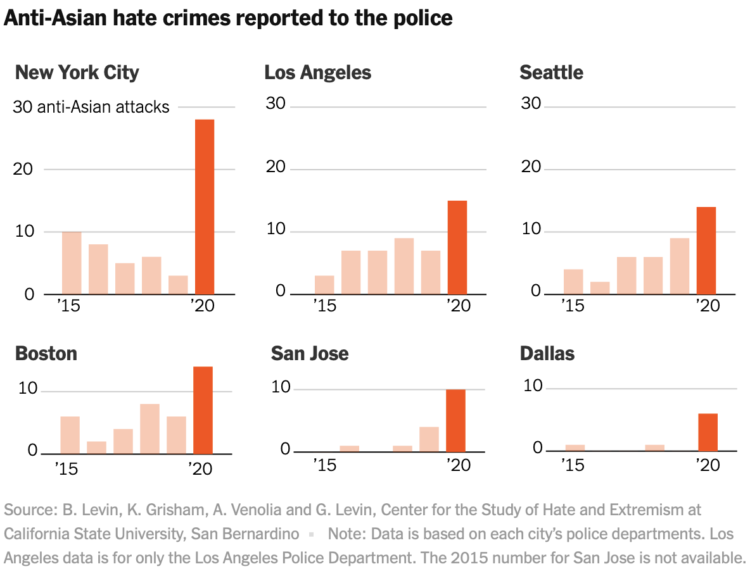

1. Consistent verticle and horizontal scales for each graph

  a. group the cities above the 10-attacks range and the cities below the 10 attacks range into different rows so to conserve space
2. the graphs separated by city keeps the results really clear. the viewer can quickly identifiy that each city has a significant increase in the # of attacks reported in 2020
3. the use of color to make the 2020 data points pop out is striking and grabs attention, and the use of the same color builds consistency and groups all the 2020 years accross the cities in the viewer's mind
4. keeping the labelling of the x & y axis simple makes it look  really clean, for example having the year range read "'15   '20" (vs. "2015, 2016, 2017, 2018, 2019, 2020"). Allows the viewer to focus on more important detials while still getting the necessary info. 
5. the visual has a clear and concise title
6. Each individual graph is labelled without taking up too much space
7. the graphs all have minimal grid lines and no outlines which keeps the clean simple look
8. The visualization looks at relevant information to tell a poinant story. its very evident that they are telling the story that anti-asian hate crimes have increased significantly in # of cases reported during 2020 relative to the last 5 years. Using 6 major cities to show this is a very comprehendable scale to understand this increase, the extend of the problem and consistency of the data. 